Importamos librerías necesarias

In [758]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)

Leer el dataset que contiene los datos del tipo de check-in realizado por el huésped, la fecha de nacimiento, nacionalidad y fecha de creación

In [759]:
guests = pd.read_csv('Data/guestsReport.csv', sep = ',')

In [760]:
guests # (columnas = id del huésped, id del cliente, tipo de check-in, año de nacimiento, nacionalidad, fecha del registro)

,id,created_by_id,origin,birth_date,nationality,created_at
0,157a01d2-8b6c-401d-b031-d17fb8ce9120,84cfd900-5fe4-4fbb-a197-fa0ca14ae6b4,LEGACY,1995-12-04,ES,2019-11-16 19:07:54.049 +0100
1,549c3371-d49c-4045-bc0c-74eba3eb8dda,7d1ab3f1-1a1f-47e7-b561-6ffcc46a63f5,LEGACY,1994-03-31,LT,2019-05-28 22:42:57.600 +0100
2,cfb13034-d92d-45ef-83a9-996e7cf4f3be,94da5494-3a4a-4f0c-9d08-c8347da19e70,LEGACY,1978-12-20,ES,2019-11-08 21:29:22.038 +0100
3,a4de29ce-0213-4e3a-85d1-920d59fd2a3b,d22feffc-264c-4e15-9b8e-cb7520b31119,IOS,1960-01-10,PL,2021-08-28 12:47:53.347 +0100
4,29084d96-d089-4469-891b-9d6deb4f69cb,0a5b1f88-320b-40fc-9dc6-9d7e715d7f47,CH_ONLINE,NaN,GB,2021-08-02 14:11:11.024 +0100
...,...,...,...,...,...,...
5016755,ea0ec14f-6b10-4ea0-bf0e-c1e616280f38,a411d45a-18b8-44d7-b746-5ce43027af21,GUEST_APP,1978-11-15,IT,2022-08-03 23:31:50.318 +0100
5016756,27567ef8-572c-4e7f-a130-66c23d75fe14,0da552ab-3cae-46cb-95a9-662a23a498cc,ANDROID,1983-01-28,GB,2022-08-04 15:22:27.516 +0100
5016757,90512727-7f2f-4ac6-ac06-3bc167901e9f,b357c8a7-b82e-46f4-ae54-8b687c9d3afa,ANDROID,1984-02-14,US,2022-08-02 16:15:15.022 +0100
5016758,59052bf4-ecb5-4b7a-841a-95c632a85ed2,a411d45a-18b8-44d7-b746-5ce43027af21,GUEST_APP,1994-03-18,US,2022-08-15 15:34:09.501 +0100


In [761]:
guests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016760 entries, 0 to 5016759
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   id             object
 1   created_by_id  object
 2   origin         object
 3   birth_date     object
 4   nationality    object
 5   created_at     object
dtypes: object(6)
memory usage: 229.6+ MB


Pasar a datetime la columna created_at (object)

In [762]:
guests.created_at = pd.to_datetime(guests.created_at)

guests.head()

,id,created_by_id,origin,birth_date,nationality,created_at
0,157a01d2-8b6c-401d-b031-d17fb8ce9120,84cfd900-5fe4-4fbb-a197-fa0ca14ae6b4,LEGACY,1995-12-04,ES,2019-11-16 19:07:54.049000+01:00
1,549c3371-d49c-4045-bc0c-74eba3eb8dda,7d1ab3f1-1a1f-47e7-b561-6ffcc46a63f5,LEGACY,1994-03-31,LT,2019-05-28 22:42:57.600000+01:00
2,cfb13034-d92d-45ef-83a9-996e7cf4f3be,94da5494-3a4a-4f0c-9d08-c8347da19e70,LEGACY,1978-12-20,ES,2019-11-08 21:29:22.038000+01:00
3,a4de29ce-0213-4e3a-85d1-920d59fd2a3b,d22feffc-264c-4e15-9b8e-cb7520b31119,IOS,1960-01-10,PL,2021-08-28 12:47:53.347000+01:00
4,29084d96-d089-4469-891b-9d6deb4f69cb,0a5b1f88-320b-40fc-9dc6-9d7e715d7f47,CH_ONLINE,NaN,GB,2021-08-02 14:11:11.024000+01:00


In [763]:
guests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016760 entries, 0 to 5016759
Data columns (total 6 columns):
 #   Column         Dtype                               
---  ------         -----                               
 0   id             object                              
 1   created_by_id  object                              
 2   origin         object                              
 3   birth_date     object                              
 4   nationality    object                              
 5   created_at     datetime64[ns, pytz.FixedOffset(60)]
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), object(5)
memory usage: 229.6+ MB


Ordenar las fechas de más reciente a más antigua, para quedarnos con la más reciente de cada usuario.

Así sabemos cuál es el último día que uso la app

In [764]:
guests_fecha = guests.sort_values(by='created_at', ascending=False)
guests_fecha

,id,created_by_id,origin,birth_date,nationality,created_at
1271537,558d18b7-85cc-4e00-a749-f5fa881b6d2c,9b0d38af-abad-4f9d-8f74-273a512aec4e,ANDROID,2007-03-11,ES,2022-10-19 19:08:26.034000+01:00
4503566,f757f856-db55-45c8-9bb1-93f3fab2963e,57484894-eb24-4800-b1e3-d57b042481cb,GUEST_APP,1996-08-28,NL,2022-10-19 19:08:21.777000+01:00
3561811,6ce92eac-dc27-494f-bb7a-2bac8a2266e3,2ccba492-beaa-49d9-ae93-1473f591b939,GUEST_APP,1971-01-14,NL,2022-10-19 19:08:21.719000+01:00
537128,a07ef611-6677-408c-ae64-a9dae949dd0a,4edc7d81-b83b-4b14-92d8-d485d7c1c463,GUEST_APP,1982-12-28,ES,2022-10-19 19:08:19.572000+01:00
3941554,ab49a7fe-67c3-487a-bb05-e3ae11bee9f8,caba2d30-fc84-4ab8-87d0-cf274f276ee2,ANDROID,2001-08-29,RO,2022-10-19 19:08:15.010000+01:00
...,...,...,...,...,...,...
1558256,51eaada8-f6a0-4fc0-802a-4b45aa2a31f9,29f49667-4605-4ff5-b089-0c122c9c2486,LEGACY,1969-10-07,LT,2018-01-23 18:09:42.852000+01:00
2928425,6b63f0d0-c60c-43a6-8858-ac8f7acdf296,9677ec86-953f-4fc0-997d-b6290550a600,LEGACY,1996-04-22,BR,2018-01-19 21:37:52.902000+01:00
4079275,6b63f0d0-c60c-43a6-8858-ac8f7acdf296,9677ec86-953f-4fc0-997d-b6290550a600,LEGACY,1999-03-08,BR,2018-01-19 21:37:52.893000+01:00
4881304,6b63f0d0-c60c-43a6-8858-ac8f7acdf296,9677ec86-953f-4fc0-997d-b6290550a600,LEGACY,1962-08-24,BR,2018-01-19 21:37:52.885000+01:00


Nos quedamos solo con el año/mes/día

In [765]:
guests_fecha.created_at = guests_fecha.created_at.dt.date
guests_fecha

,id,created_by_id,origin,birth_date,nationality,created_at
1271537,558d18b7-85cc-4e00-a749-f5fa881b6d2c,9b0d38af-abad-4f9d-8f74-273a512aec4e,ANDROID,2007-03-11,ES,2022-10-19
4503566,f757f856-db55-45c8-9bb1-93f3fab2963e,57484894-eb24-4800-b1e3-d57b042481cb,GUEST_APP,1996-08-28,NL,2022-10-19
3561811,6ce92eac-dc27-494f-bb7a-2bac8a2266e3,2ccba492-beaa-49d9-ae93-1473f591b939,GUEST_APP,1971-01-14,NL,2022-10-19
537128,a07ef611-6677-408c-ae64-a9dae949dd0a,4edc7d81-b83b-4b14-92d8-d485d7c1c463,GUEST_APP,1982-12-28,ES,2022-10-19
3941554,ab49a7fe-67c3-487a-bb05-e3ae11bee9f8,caba2d30-fc84-4ab8-87d0-cf274f276ee2,ANDROID,2001-08-29,RO,2022-10-19
...,...,...,...,...,...,...
1558256,51eaada8-f6a0-4fc0-802a-4b45aa2a31f9,29f49667-4605-4ff5-b089-0c122c9c2486,LEGACY,1969-10-07,LT,2018-01-23
2928425,6b63f0d0-c60c-43a6-8858-ac8f7acdf296,9677ec86-953f-4fc0-997d-b6290550a600,LEGACY,1996-04-22,BR,2018-01-19
4079275,6b63f0d0-c60c-43a6-8858-ac8f7acdf296,9677ec86-953f-4fc0-997d-b6290550a600,LEGACY,1999-03-08,BR,2018-01-19
4881304,6b63f0d0-c60c-43a6-8858-ac8f7acdf296,9677ec86-953f-4fc0-997d-b6290550a600,LEGACY,1962-08-24,BR,2018-01-19


Nos quedamos con la última fecha de cada cliente, es decir, la fecha en la que realizó el último check-in

In [766]:
guests_fecha_ultima = guests_fecha.groupby('created_by_id')[['created_at']].max().reset_index().sort_values(by= 'created_at',ascending=False)
guests_fecha_ultima

,created_by_id,created_at
3516,7e61a262-fb7a-420f-ab1c-9ab49eb5f0be,2022-10-19
4465,a0ba189a-c22f-4cb1-ad4a-16e450615761,2022-10-19
4218,97c0e152-0b1b-429b-8571-31973854a010,2022-10-19
4224,980b8bcd-566e-42aa-9b1a-dfce983d22e9,2022-10-19
978,21aa25f3-6246-4865-b50a-90cc19f51b0e,2022-10-19
...,...,...
6762,f6ab4920-10b9-4284-91c1-d563f347f45e,2018-05-29
3300,76755f2a-d5b0-46f3-9e6d-1370fa262abe,2018-05-16
640,166de23c-3154-405b-a18d-426532c35840,2018-03-26
3113,70b612d2-2b3d-4d9f-9ab5-ef205aaaadda,2018-03-15


Contar el número total de registros que ha hecho cada cliente

In [767]:
guests_id_total = guests_fecha.groupby('created_by_id')[['id']].count().reset_index()
guests_id_total

,created_by_id,id
0,0005ad96-8ea6-4d53-853f-1b191c840579,597
1,00153135-a369-450b-864c-85079eb95678,3862
2,001b4089-2a0b-4c7a-8e64-9596c7838658,118
3,001f1ce6-b954-4e6f-b504-bd64f79ae584,187
4,00289df1-fe98-4003-ad71-d60dc5da743d,38
...,...,...
7027,ffd2ae25-6505-4b1a-85f1-cef7c7113432,2
7028,ffe1b94e-d249-49c9-b4d4-a10159c9726a,49
7029,ffe4040b-50d4-431a-bd59-035a323e3298,9
7030,ffef0ab9-01da-4306-a4de-96f346502025,115


Concatenar los dos df, eliminar la columna created_by_id (que estaba repetida) y renombrar las columnas


In [768]:
clientes = pd.concat([guests_id_total, guests_fecha_ultima], axis=1).sort_values(by='created_at', ascending = False).reset_index(drop=True)

clientes = clientes.iloc[:,1:]

clientes.columns = ['Total_registros', 'ID_usuario', 'Fecha_último_registro']

clientes

,Total_registros,ID_usuario,Fecha_último_registro
0,570,7e61a262-fb7a-420f-ab1c-9ab49eb5f0be,2022-10-19
1,66,a0ba189a-c22f-4cb1-ad4a-16e450615761,2022-10-19
2,247,97c0e152-0b1b-429b-8571-31973854a010,2022-10-19
3,197,980b8bcd-566e-42aa-9b1a-dfce983d22e9,2022-10-19
4,95,21aa25f3-6246-4865-b50a-90cc19f51b0e,2022-10-19
...,...,...,...
7027,4,f6ab4920-10b9-4284-91c1-d563f347f45e,2018-05-29
7028,18,76755f2a-d5b0-46f3-9e6d-1370fa262abe,2018-05-16
7029,2,166de23c-3154-405b-a18d-426532c35840,2018-03-26
7030,2,70b612d2-2b3d-4d9f-9ab5-ef205aaaadda,2018-03-15


Leer el dataset en el que vienen los datos de Email, tipo de propiedad (casa/hotel), estado (activo/no activo) y nº de propiedades

In [769]:
report = pd.read_csv("Data/report (2).csv", sep = ',').rename(columns = {'email' : 'Email'})

Cambiar el nombre de la columna id para posteriormente poder hacer merge con otro dataframe

In [770]:
report = report.rename(columns = {"id": "ID_usuario"})
report

,ID_usuario,company_name,Email,account_type,state,country,number_of_properties
0,58b1bf01-88a0-444f-b314-1ea95da805f7,NaN,info@lacasuena.com,HOT,ACTIVE,NaN,0
1,4f6cc170-eea7-4faf-ad05-84a08e81161c,NaN,toma_sorin21@yahoo.com,NaN,ACTIVE,NaN,0
2,96888111-add3-49fd-8b57-0e74eeb137d1,NaN,rmsonck@gmail.com,NaN,ACTIVE,NaN,0
3,d4656ae2-6e66-4a4b-8034-61f1005941d4,NaN,tucasaenlogrono@gmail.com,HOU,ACTIVE,NaN,4
4,89e524ec-5ae7-4921-8db3-d772e8ebc14e,NaN,veronica10juan@yahoo.es,NaN,ACTIVE,NaN,0
...,...,...,...,...,...,...,...
14681,111d9b9d-0963-4a9b-8aba-00143f8c1b13,NaN,deleted_2022_03_26__15_25_23_info@rentitup.es,HOU,DELETED,NaN,1
14682,6eb6bdd7-bf8a-479a-8319-4863e826e643,NaN,deleted_2021_09_18__20_11_49_judith.revuelta99...,NaN,DELETED,NaN,0
14683,42c5909b-8f2f-410e-ac85-db6fa6dc7b84,NaN,comperik@gmail.com,HOU,ACTIVE,NaN,12
14684,f2c747d4-14c6-4be5-8068-05ca9a93ef7d,NaN,isegcha@gmail.com,NaN,ACTIVE,NaN,1


Eliminar las filas de aquellos emails que empiezan por 'deleted' (están repetidos)

In [771]:
report = report[report.Email.str.contains("deleted") == False]

Eliminar las columnas innecesarias y renombrar la de email para poder luego juntarla a otro df

In [772]:
report = report.drop(columns=['company_name', 'account_type', 'state', 'country'], axis=1)
report = report.rename(columns={'Email': 'Emails'})
report

,ID_usuario,Emails,number_of_properties
0,58b1bf01-88a0-444f-b314-1ea95da805f7,info@lacasuena.com,0
1,4f6cc170-eea7-4faf-ad05-84a08e81161c,toma_sorin21@yahoo.com,0
2,96888111-add3-49fd-8b57-0e74eeb137d1,rmsonck@gmail.com,0
3,d4656ae2-6e66-4a4b-8034-61f1005941d4,tucasaenlogrono@gmail.com,4
4,89e524ec-5ae7-4921-8db3-d772e8ebc14e,veronica10juan@yahoo.es,0
...,...,...,...
14678,8ae17cc7-418d-4767-bec4-5daa1f653c27,stay@hiwya.com,2
14680,419d5579-9dc8-4b4a-957a-1904a8ee3c2f,talidearriba@gmail.com,1
14683,42c5909b-8f2f-410e-ac85-db6fa6dc7b84,comperik@gmail.com,12
14684,f2c747d4-14c6-4be5-8068-05ca9a93ef7d,isegcha@gmail.com,1


Unir ambos dataframes para tener los emails en el dataframe clientes

In [773]:
clientes_registros=pd.merge(report,clientes, on= 'ID_usuario')
clientes_registros

,ID_usuario,Emails,number_of_properties,Total_registros,Fecha_último_registro
0,d4656ae2-6e66-4a4b-8034-61f1005941d4,tucasaenlogrono@gmail.com,4,468,2022-10-19
1,826d02bc-04f2-4537-94f0-91b6494617a6,reservas@picoseuropa.org,1,25,2019-08-29
2,16850870-5981-4d5c-87be-ddeed09ba696,isanchezdarias@gmail.com,1,150,2022-10-17
3,525cc2cc-83e5-441a-8c01-770d66cf5d43,info@hugobeach.es,8,12280,2022-10-19
4,356df3d0-82be-4fdf-8e01-9a77f432c7d5,mail@elamparo-granada.com,1,273,2019-11-19
...,...,...,...,...,...
5248,8ae17cc7-418d-4767-bec4-5daa1f653c27,stay@hiwya.com,2,1,2022-09-30
5249,419d5579-9dc8-4b4a-957a-1904a8ee3c2f,talidearriba@gmail.com,1,19,2020-02-23
5250,42c5909b-8f2f-410e-ac85-db6fa6dc7b84,comperik@gmail.com,12,110,2022-10-19
5251,f2c747d4-14c6-4be5-8068-05ca9a93ef7d,isegcha@gmail.com,1,21,2019-05-26


Leer el dataset que contiene el estado actual del cliente (alta/baja)

In [774]:
Churn_or_not = pd.read_csv('Data/contacts propiedades pw - hubspot-crm-exports-all-contacts-2022-11-20.csv')
Churn_or_not

,Record ID,Email,Created On (ProfitWell),Status (ProfitWell),Plans (ProfitWell),Churned On (ProfitWell),MRR (ProfitWell),Total Spend (ProfitWell),Associated Ticket,Associated Ticket IDs
0,27221201,reservations.bookincanarias@gmail.com,2022-11-01,Active,Vacrent basic 2.0 (vacrent_basic_monthly_2_EUR),NaN,10.00,12.10,NaN,NaN
1,25923851,robin.hage@skandiamaklarna.com,2022-10-31,Active,Vacrent basic 2.0 (vacrent_basic_monthly_2_EUR),NaN,10.00,12.10,NaN,NaN
2,21294151,alessandro@riccardiproperties.com,2022-10-31,Active,Vacrent basic 2.0 (vacrent_basic_monthly_2_EUR),NaN,10.00,11.86,NaN,NaN
3,27090101,iredondoproperties@gmail.com,2022-10-29,Active,Vacrent basic 2.0 (vacrent_basic_monthly_2_EUR),NaN,25.00,27.66,NaN,NaN
4,27078801,info@apartamentosvalle.es,2022-10-28,Active,Vacrent basic 2.0 (vacrent_basic_monthly_2_EUR),NaN,15.00,18.15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4092,651,2793576@gmail.com,2020-07-30,Active,Vacrent basic 2.0 (vacrent_basic_monthly_2_EUR),NaN,10.00,229.99,billing issue;Registro,307529404;898741636
4093,551,newvillarosa@gmail.com,2020-10-15,Active,year,NaN,3.89,100.79,Sistema no esta trabajando /?;Reserva Junio 23...,783988032;446878543
4094,451,rubenmuntion@gmail.com,2019-08-10,Cancelled,Vivienda Anual (basic-yearly-plan-20200728),NaN,3.30,59.00,NaN,NaN
4095,201,samuelsantananaranjo@gmail.com,2019-02-04,Active,Vacrent basic 2.0 (VR Basic yearly IVA 0),NaN,4.00,148.84,NaN,NaN


Eliminar del df fallos de la plataforma de Chekin, es decir, aquellos que tienen un MRR positivo y sin embargo el gasto total es 0, así como los que tienen MRR negativo

In [775]:
Churn_or_not = Churn_or_not.drop(Churn_or_not[(Churn_or_not['Total Spend (ProfitWell)'] == 0) & (Churn_or_not['MRR (ProfitWell)'] > 0)].index)
Churn_or_not = Churn_or_not.drop(Churn_or_not[Churn_or_not['MRR (ProfitWell)'] < 0].index)

Eliminar las filas que en la columna email contenga un NaN

In [776]:
Churn_or_not = Churn_or_not[Churn_or_not['Email'].notna()]

Eliminar las columnas que no necesitamos

In [777]:
Churn_or_not = Churn_or_not.drop(columns=['Record ID', 'Plans (ProfitWell)', 'Associated Ticket IDs'], axis=1)

Renombrar las columnas

In [778]:
Churn_or_not.columns =['Emails', 'Fecha_creación', 'Estado', 'Fecha_baja (si procede)', 'MRR', 'Gasto_total', 'Tickets_asociados']
Churn_or_not

,Emails,Fecha_creación,Estado,Fecha_baja (si procede),MRR,Gasto_total,Tickets_asociados
0,reservations.bookincanarias@gmail.com,2022-11-01,Active,NaN,10.00,12.10,NaN
1,robin.hage@skandiamaklarna.com,2022-10-31,Active,NaN,10.00,12.10,NaN
2,alessandro@riccardiproperties.com,2022-10-31,Active,NaN,10.00,11.86,NaN
3,iredondoproperties@gmail.com,2022-10-29,Active,NaN,25.00,27.66,NaN
4,info@apartamentosvalle.es,2022-10-28,Active,NaN,15.00,18.15,NaN
...,...,...,...,...,...,...,...
4091,alfonso@micasaisyourhouse.com,2018-03-07,Active,NaN,34.83,861.43,Nueva propiedad;Re: CheKin daily report;Conexi...
4092,2793576@gmail.com,2020-07-30,Active,NaN,10.00,229.99,billing issue;Registro
4093,newvillarosa@gmail.com,2020-10-15,Active,NaN,3.89,100.79,Sistema no esta trabajando /?;Reserva Junio 23...
4094,rubenmuntion@gmail.com,2019-08-10,Cancelled,NaN,3.30,59.00,NaN


Quitar las filas que no necesitamos de la columna estado, es decir, aquellas que no sean 'activo' o 'churned'

In [779]:
Churn_or_not = Churn_or_not[(Churn_or_not.Estado != 'Cancelled') | (Churn_or_not.Estado !='Churned Trial') | (Churn_or_not.Estado !='Trialing')]
Churn_or_not = Churn_or_not[(Churn_or_not.Estado !='Churned Trial')]
Churn_or_not = Churn_or_not[(Churn_or_not.Estado !='Trialing')]
Churn_or_not = Churn_or_not[(Churn_or_not.Estado !='Cancelled')]

Reemplazar los dos tipos de churn (voluntary, delinquent) por un churned general

In [780]:
Churn_or_not.Estado = Churn_or_not.Estado.apply(lambda x: 'Churned' if 'Churned' in x else x)
Churn_or_not.head()

,Emails,Fecha_creación,Estado,Fecha_baja (si procede),MRR,Gasto_total,Tickets_asociados
0,reservations.bookincanarias@gmail.com,2022-11-01,Active,NaN,10.0,12.10,NaN
1,robin.hage@skandiamaklarna.com,2022-10-31,Active,NaN,10.0,12.10,NaN
2,alessandro@riccardiproperties.com,2022-10-31,Active,NaN,10.0,11.86,NaN
3,iredondoproperties@gmail.com,2022-10-29,Active,NaN,25.0,27.66,NaN
4,info@apartamentosvalle.es,2022-10-28,Active,NaN,15.0,18.15,NaN


In [781]:
Churn_or_not.Estado.value_counts()

Active     2026
Churned    1901
Name: Estado, dtype: int64

Sacar de la columna Tickets asociados (las incidencias puestas por el cliente) el número de tickets puesto por cada ID. Los tickets están separados por ';'

Rellenar los NaN con 0

Cambiar el tipo a entero

Añadir un ticket más a los tickets_asociados > 0 porque he contado los ; no cada incidencia (que sería una más)

In [782]:
Churn_or_not['Tickets_asociados'] = Churn_or_not['Tickets_asociados'].str.count(';')
Churn_or_not['Tickets_asociados'] = Churn_or_not['Tickets_asociados'].fillna(0)
Churn_or_not['Tickets_asociados'] = Churn_or_not['Tickets_asociados'].astype(np.int64)
Churn_or_not['Tickets_asociados'] = Churn_or_not['Tickets_asociados'].apply(lambda x: x + 1 if x >0 else x)

Churn_or_not

,Emails,Fecha_creación,Estado,Fecha_baja (si procede),MRR,Gasto_total,Tickets_asociados
0,reservations.bookincanarias@gmail.com,2022-11-01,Active,NaN,10.00,12.10,0
1,robin.hage@skandiamaklarna.com,2022-10-31,Active,NaN,10.00,12.10,0
2,alessandro@riccardiproperties.com,2022-10-31,Active,NaN,10.00,11.86,0
3,iredondoproperties@gmail.com,2022-10-29,Active,NaN,25.00,27.66,0
4,info@apartamentosvalle.es,2022-10-28,Active,NaN,15.00,18.15,0
...,...,...,...,...,...,...,...
4090,dalumaproperties@gmail.com,2021-01-05,Active,NaN,43.55,478.70,4
4091,alfonso@micasaisyourhouse.com,2018-03-07,Active,NaN,34.83,861.43,3
4092,2793576@gmail.com,2020-07-30,Active,NaN,10.00,229.99,2
4093,newvillarosa@gmail.com,2020-10-15,Active,NaN,3.89,100.79,2


Unir el df creado anteriormente con el nuevo y renombrar las columnas

In [783]:
final_df = pd.merge(clientes_registros,Churn_or_not, on= 'Emails')

final_df = final_df[['ID_usuario', 'Emails', 'Estado', 'Fecha_creación', 'Fecha_baja (si procede)', 'Total_registros', 'Fecha_último_registro', 'number_of_properties', 'Tickets_asociados', 'MRR', 'Gasto_total']]

final_df

,ID_usuario,Emails,Estado,Fecha_creación,Fecha_baja (si procede),Total_registros,Fecha_último_registro,number_of_properties,Tickets_asociados,MRR,Gasto_total
0,826d02bc-04f2-4537-94f0-91b6494617a6,reservas@picoseuropa.org,Churned,2018-12-25,2022-01-04,25,2019-08-29,1,0,0.00,126.89
1,525cc2cc-83e5-441a-8c01-770d66cf5d43,info@hugobeach.es,Active,2021-02-17,NaN,12280,2022-10-19,8,3,73.83,1150.22
2,356df3d0-82be-4fdf-8e01-9a77f432c7d5,mail@elamparo-granada.com,Active,2018-05-20,NaN,273,2019-11-19,1,0,4.00,183.35
3,730ee1f9-bf10-4c00-96b9-482937ec6357,chamaidacedres@hotmail.com,Active,2022-02-10,NaN,317,2022-10-19,5,2,20.00,95.64
4,80f3bf31-3ad7-4024-9a45-d75d647b79cd,palenzuela.artiles@gmail.com,Churned,2019-02-18,2022-04-15,380,2022-02-09,2,2,0.00,68.71
...,...,...,...,...,...,...,...,...,...,...,...
2964,fd4fb607-a338-4596-b75e-f2d730475fe0,pensionviaxix@gmail.com,Churned,2019-09-14,2022-07-07,426,2019-11-12,1,0,0.00,74.23
2965,e455ea8a-67c6-4af1-a88b-145d0b924c5a,office@firsthostel.ro,Active,2022-02-10,NaN,4364,2022-10-17,1,4,51.15,304.05
2966,419d5579-9dc8-4b4a-957a-1904a8ee3c2f,talidearriba@gmail.com,Churned,2019-09-18,2021-10-02,19,2020-02-23,1,0,0.00,77.38
2967,42c5909b-8f2f-410e-ac85-db6fa6dc7b84,comperik@gmail.com,Active,2022-09-07,NaN,110,2022-10-19,12,0,56.50,205.10


Eliminar un registro que utiliza una forma de pago diferente, por tanto no queda reflejado en el dataframe

In [784]:
i = final_df[(final_df.MRR == 0.0) & (final_df.Gasto_total == 0.0) & (final_df.Estado == 'Active')].index
final_df.drop(i, inplace= True)

In [785]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 0 to 2968
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_usuario               2968 non-null   object 
 1   Emails                   2968 non-null   object 
 2   Estado                   2968 non-null   object 
 3   Fecha_creación           2951 non-null   object 
 4   Fecha_baja (si procede)  1110 non-null   object 
 5   Total_registros          2968 non-null   int64  
 6   Fecha_último_registro    2968 non-null   object 
 7   number_of_properties     2968 non-null   int64  
 8   Tickets_asociados        2968 non-null   int64  
 9   MRR                      2968 non-null   float64
 10  Gasto_total              2968 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 278.2+ KB


Pasar a datetime las variables temporales 

In [786]:
final_df['Fecha_creación'] = pd.to_datetime(final_df['Fecha_creación'])
final_df['Fecha_baja (si procede)'] = pd.to_datetime(final_df['Fecha_baja (si procede)'])
final_df['Fecha_último_registro'] = pd.to_datetime(final_df['Fecha_último_registro'])

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 0 to 2968
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID_usuario               2968 non-null   object        
 1   Emails                   2968 non-null   object        
 2   Estado                   2968 non-null   object        
 3   Fecha_creación           2951 non-null   datetime64[ns]
 4   Fecha_baja (si procede)  1110 non-null   datetime64[ns]
 5   Total_registros          2968 non-null   int64         
 6   Fecha_último_registro    2968 non-null   datetime64[ns]
 7   number_of_properties     2968 non-null   int64         
 8   Tickets_asociados        2968 non-null   int64         
 9   MRR                      2968 non-null   float64       
 10  Gasto_total              2968 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(3), object(3)
memory usage: 278.2+ KB


In [787]:
from datetime import datetime
fecha_cad1 = '21-10-2022' # fecha en la que se me pasó el reporte
fecha1 = datetime.strptime(fecha_cad1, '%d-%m-%Y')

# Calcular el tiempo desde la última vez que el cliente usó la aplicación hasta día de hoy o hasta la fecha de baja en caso de baja
final_df['Tiempo_sin_uso'] = (fecha1 - pd.to_datetime(final_df['Fecha_último_registro'])).dt.days
final_df['Tiempo_sin_uso_baja'] = (pd.to_timedelta(final_df['Fecha_baja (si procede)'] - final_df['Fecha_último_registro'])).dt.days

# Calcular el tiempo que se han llevado como clientes en la empresa, tomando de referencia la fecha de creación y el día de hoy o la fecha de baja
final_df['Antiguedad'] = (fecha1 - pd.to_datetime(final_df['Fecha_creación'])).dt.days
final_df['Antiguedad_baja'] = (pd.to_timedelta(final_df['Fecha_baja (si procede)'] - final_df['Fecha_creación'])).dt.days

# Sustituir el tiempo sin uso de aquellos que están de baja por 0 y posteriormente por el valor de la columna de los clientes de baja
final_df['Tiempo_sin_uso'].mask(final_df.Estado == 'Churned', 0, inplace = True)
final_df['Tiempo_sin_uso'].mask(final_df['Tiempo_sin_uso'] == 0, final_df['Tiempo_sin_uso_baja'], inplace = True)

# Sustituir la antiguedad de aquellos que están de baja por 0 y posteriormente por el valor de la columna de los clientes de baja
final_df['Antiguedad'].mask(final_df.Estado == 'Churned', 0, inplace = True)
final_df['Antiguedad'].mask(final_df['Antiguedad'] == 0, final_df['Antiguedad_baja'], inplace = True)

final_df.head()

,ID_usuario,Emails,Estado,Fecha_creación,Fecha_baja (si procede),Total_registros,Fecha_último_registro,number_of_properties,Tickets_asociados,MRR,Gasto_total,Tiempo_sin_uso,Tiempo_sin_uso_baja,Antiguedad,Antiguedad_baja
0,826d02bc-04f2-4537-94f0-91b6494617a6,reservas@picoseuropa.org,Churned,2018-12-25,2022-01-04,25,2019-08-29,1,0,0.00,126.89,859,859.0,1106.0,1106.0
1,525cc2cc-83e5-441a-8c01-770d66cf5d43,info@hugobeach.es,Active,2021-02-17,NaT,12280,2022-10-19,8,3,73.83,1150.22,2,NaN,611.0,NaN
2,356df3d0-82be-4fdf-8e01-9a77f432c7d5,mail@elamparo-granada.com,Active,2018-05-20,NaT,273,2019-11-19,1,0,4.00,183.35,1067,NaN,1615.0,NaN
3,730ee1f9-bf10-4c00-96b9-482937ec6357,chamaidacedres@hotmail.com,Active,2022-02-10,NaT,317,2022-10-19,5,2,20.00,95.64,2,NaN,253.0,NaN
4,80f3bf31-3ad7-4024-9a45-d75d647b79cd,palenzuela.artiles@gmail.com,Churned,2019-02-18,2022-04-15,380,2022-02-09,2,2,0.00,68.71,65,65.0,1152.0,1152.0


Filtrar por aquellos que están de baja para sacar los meses que más se dan de baja

In [788]:
final_df_baja = final_df[final_df.Estado == 'Churned']
final_df_baja.head(2)

,ID_usuario,Emails,Estado,Fecha_creación,Fecha_baja (si procede),Total_registros,Fecha_último_registro,number_of_properties,Tickets_asociados,MRR,Gasto_total,Tiempo_sin_uso,Tiempo_sin_uso_baja,Antiguedad,Antiguedad_baja
0,826d02bc-04f2-4537-94f0-91b6494617a6,reservas@picoseuropa.org,Churned,2018-12-25,2022-01-04,25,2019-08-29,1,0,0.0,126.89,859,859.0,1106.0,1106.0
4,80f3bf31-3ad7-4024-9a45-d75d647b79cd,palenzuela.artiles@gmail.com,Churned,2019-02-18,2022-04-15,380,2022-02-09,2,2,0.0,68.71,65,65.0,1152.0,1152.0


In [789]:
final_df_baja.groupby(final_df_baja['Fecha_baja (si procede)'].dt.month).sum()

,Total_registros,number_of_properties,Tickets_asociados,MRR,Gasto_total,Tiempo_sin_uso,Tiempo_sin_uso_baja,Antiguedad,Antiguedad_baja
Fecha_baja (si procede),,,,,,,,,
1,21423,194,54,61.73,8269.62,11970,11970.0,32332.0,32332.0
2,36268,369,35,3.73,4674.34,11751,11751.0,38748.0,38748.0
3,42720,315,53,50.40,6445.65,7532,7532.0,34183.0,34183.0
4,123293,432,74,0.00,25837.42,12511,12511.0,52422.0,52422.0
5,23618,327,46,126.93,10370.46,12028,12028.0,47247.0,47247.0
6,32956,431,85,489.50,14330.04,15947,15947.0,55473.0,55473.0
7,44598,439,95,3.93,14577.47,18324,18324.0,69200.0,69200.0
8,78207,434,122,214.05,16843.22,15860,15860.0,81606.0,81606.0
9,70853,579,180,12.00,28103.72,22946,22946.0,97275.0,97275.0


In [790]:
mes_baja = final_df_baja.groupby(final_df_baja['Fecha_baja (si procede)'].dt.month)['ID_usuario'].count()
mes_baja.index = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

<AxesSubplot: ylabel='ID_usuario'>

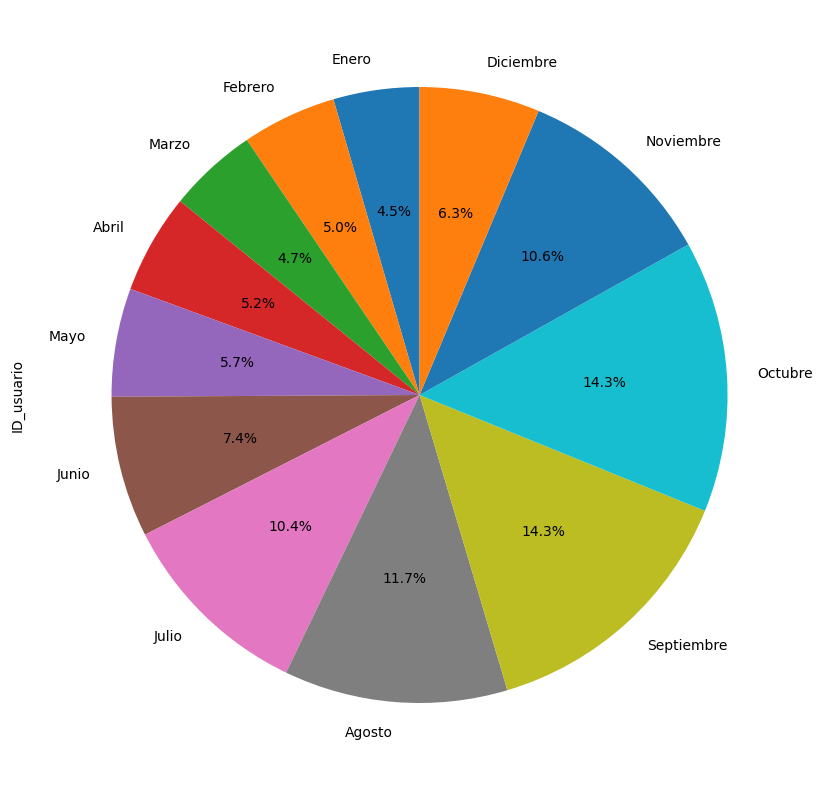

In [791]:
mes_baja.plot.pie(figsize = (10,10),startangle=90, y=mes_baja.index, autopct='%1.1f%%')

In [792]:
# Se han encontrado clientes que estaban utilizando el producto después de darse de baja
uso_post_baja = final_df.sort_values(by= 'Tiempo_sin_uso').head(150)
uso_post_baja.head(2)

,ID_usuario,Emails,Estado,Fecha_creación,Fecha_baja (si procede),Total_registros,Fecha_último_registro,number_of_properties,Tickets_asociados,MRR,Gasto_total,Tiempo_sin_uso,Tiempo_sin_uso_baja,Antiguedad,Antiguedad_baja
2270,cd230116-159b-44c4-ac58-305a1e788d1c,gmollvidal@hotmail.com,Churned,2018-03-24,2019-04-23,705,2022-10-18,2,0,0.0,23.40,-1274,-1274.0,395.0,395.0
949,d41dea99-7e38-4855-abf0-2f9bb2c62bdc,samuchinea@gmail.com,Churned,2018-08-14,2020-09-15,132,2022-08-20,3,0,0.0,45.81,-704,-704.0,763.0,763.0


Eliminar columnas innecesarias para la predicción

In [793]:
final_df = final_df.drop(columns=['ID_usuario', 'Emails', 'Fecha_creación', 'Fecha_baja (si procede)', 'Fecha_último_registro', 'Tiempo_sin_uso_baja', 'Antiguedad_baja'], axis=1)
final_df

,Estado,Total_registros,number_of_properties,Tickets_asociados,MRR,Gasto_total,Tiempo_sin_uso,Antiguedad
0,Churned,25,1,0,0.00,126.89,859,1106.0
1,Active,12280,8,3,73.83,1150.22,2,611.0
2,Active,273,1,0,4.00,183.35,1067,1615.0
3,Active,317,5,2,20.00,95.64,2,253.0
4,Churned,380,2,2,0.00,68.71,65,1152.0
...,...,...,...,...,...,...,...,...
2964,Churned,426,1,0,0.00,74.23,968,1027.0
2965,Active,4364,1,4,51.15,304.05,4,253.0
2966,Churned,19,1,0,0.00,77.38,587,745.0
2967,Active,110,12,0,56.50,205.10,2,44.0


In [794]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2968 entries, 0 to 2968
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Estado                2968 non-null   object 
 1   Total_registros       2968 non-null   int64  
 2   number_of_properties  2968 non-null   int64  
 3   Tickets_asociados     2968 non-null   int64  
 4   MRR                   2968 non-null   float64
 5   Gasto_total           2968 non-null   float64
 6   Tiempo_sin_uso        2968 non-null   int64  
 7   Antiguedad            2951 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 208.7+ KB


Eliminar los NaN del dataframe

In [795]:
final_df = final_df.dropna()

Hacer un labelEncoder para la columna de Estado, estableciendo 1 para los que se dan de baja y 0 para los activos

In [796]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
final_df.Estado = le.fit_transform(final_df.Estado)

In [797]:
final_df.reset_index(inplace=True, drop =True)
final_df.head()

,Estado,Total_registros,number_of_properties,Tickets_asociados,MRR,Gasto_total,Tiempo_sin_uso,Antiguedad
0,1,25,1,0,0.00,126.89,859,1106.0
1,0,12280,8,3,73.83,1150.22,2,611.0
2,0,273,1,0,4.00,183.35,1067,1615.0
3,0,317,5,2,20.00,95.64,2,253.0
4,1,380,2,2,0.00,68.71,65,1152.0


Pasar a entero los valores de Antiguedad

In [798]:
final_df.loc[:,'Antiguedad'] = (final_df['Antiguedad']).astype(int)

Eliminar los registros peculiares, en los que el último uso de Chekin es posterior a la fecha de baja del usuario

In [799]:
final_df.drop(final_df[final_df['Tiempo_sin_uso'] < 0].index, inplace=True)
final_df.drop(final_df[final_df['Antiguedad'] < 0].index, inplace=True)

Eliminamos la columna MRR porque en todos los clientes de baja su valor es 0, por tanto no nos sirve para predecir

In [800]:
final_df.drop('MRR', inplace=True, axis=1)

In [801]:
final_df.reset_index(inplace=True, drop= True)

In [802]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Estado                2800 non-null   int32  
 1   Total_registros       2800 non-null   int64  
 2   number_of_properties  2800 non-null   int64  
 3   Tickets_asociados     2800 non-null   int64  
 4   Gasto_total           2800 non-null   float64
 5   Tiempo_sin_uso        2800 non-null   int64  
 6   Antiguedad            2800 non-null   int32  
dtypes: float64(1), int32(2), int64(4)
memory usage: 131.4 KB


Vemos cómo se distribuyen nuestros datos

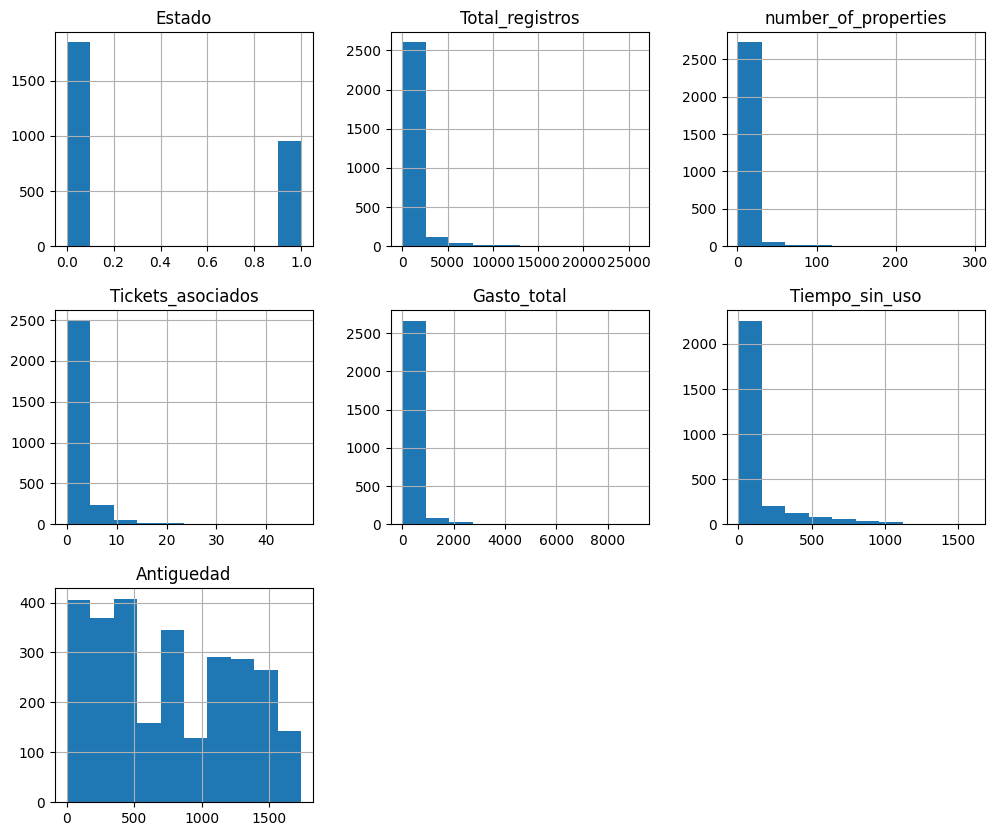

In [803]:
final_df.hist(figsize=(12,10));

Quitar aquellas entradas que sean 'outliers', en total 40 entradas (para que podamos visualizar mejor)

In [804]:
final_df = final_df[(final_df['Total_registros']<7500) & (final_df['number_of_properties']<40) & (final_df['Tickets_asociados']<10) & (final_df['Gasto_total']<2000) & (final_df['Tiempo_sin_uso']<750)]

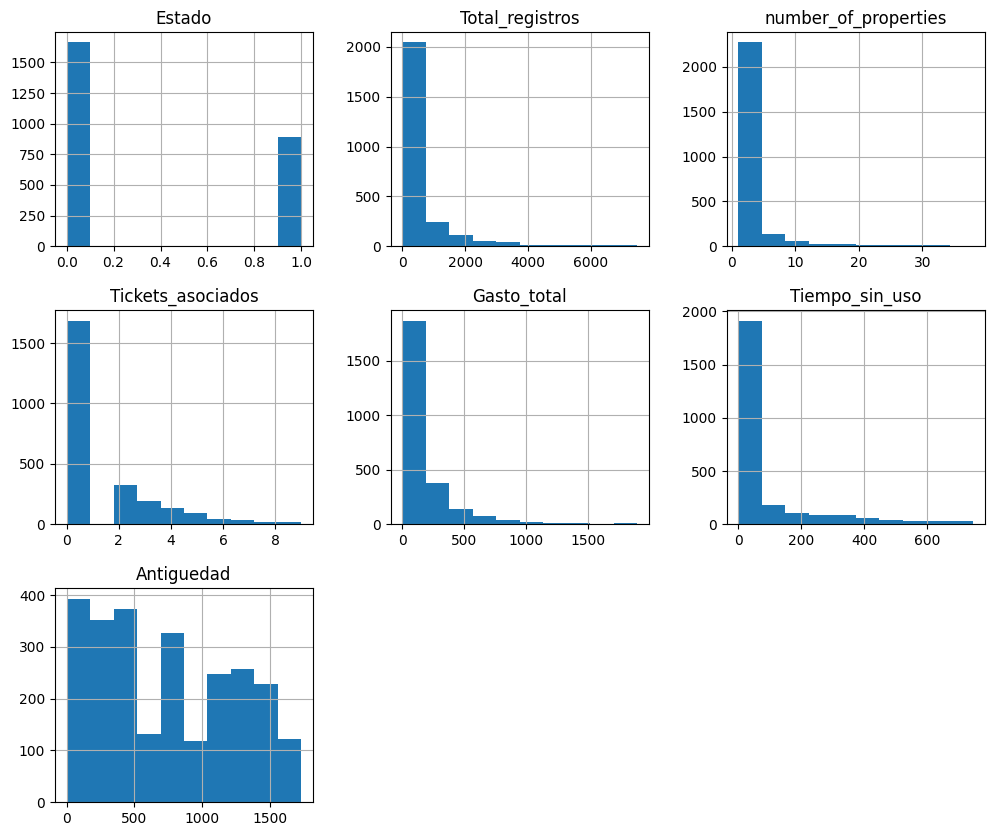

In [805]:
final_df.hist(figsize=(12,10));

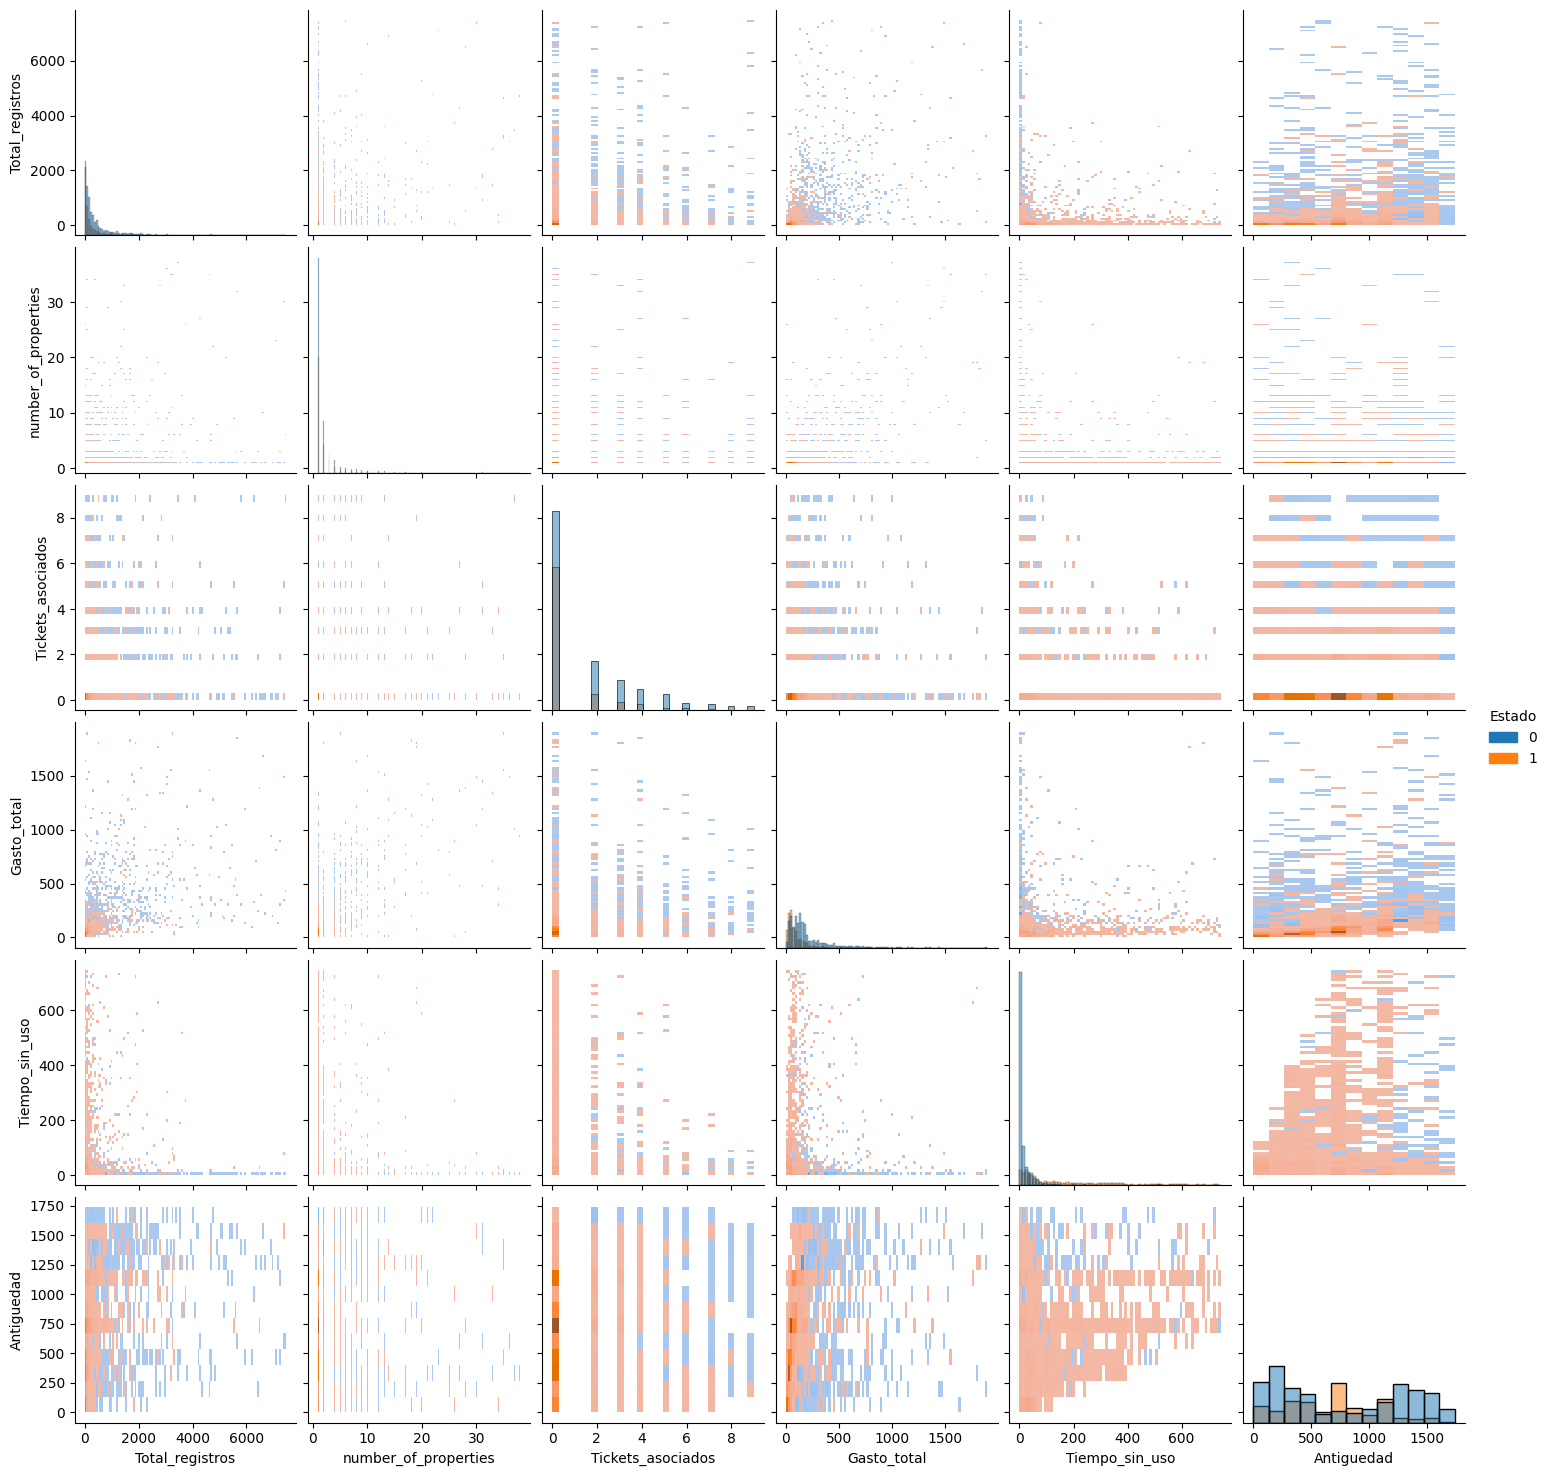

In [806]:
import seaborn as sns

sns.pairplot(final_df,
             kind='hist', hue = 'Estado')

Ver la correlación entre las diferentes columnas

<AxesSubplot: >

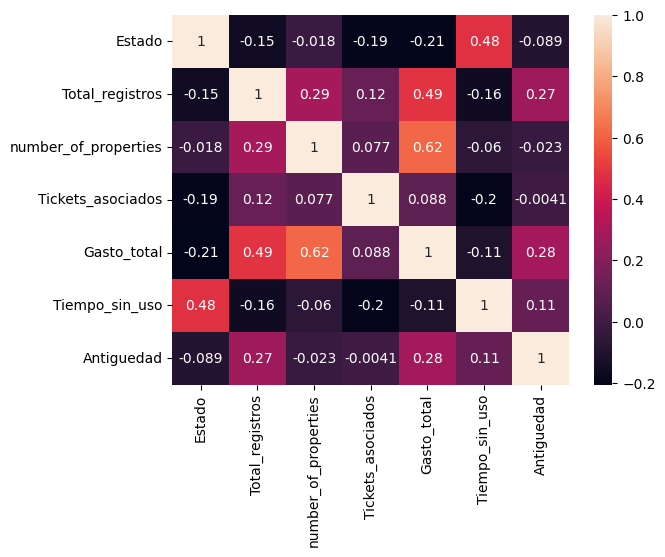

In [807]:
import seaborn as sns
sns.heatmap(final_df.corr(), annot=True)


Representar en gráficas la relación que hemos visto que existe entre el estado del cliente y el resto de variables

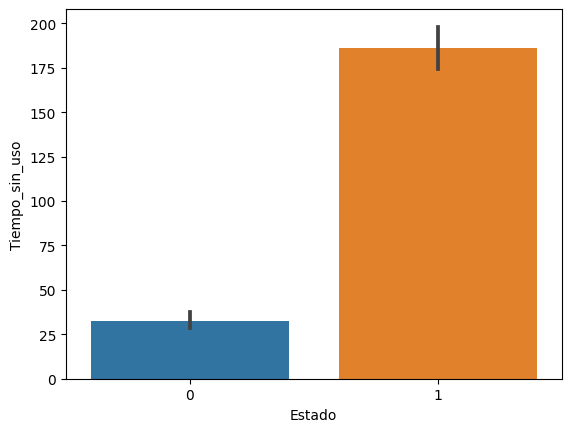

In [808]:
sns.barplot(x = final_df['Estado'], y = final_df["Tiempo_sin_uso"]);

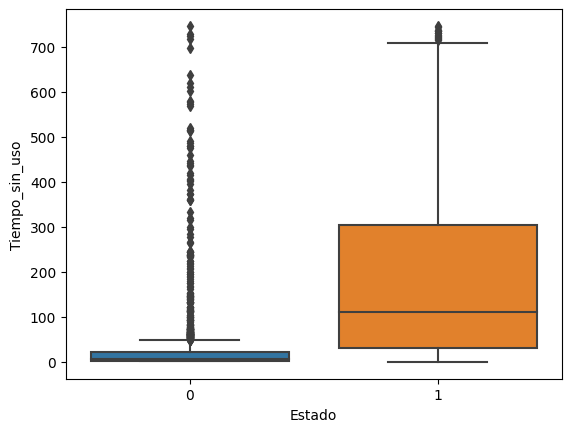

In [809]:
sns.boxplot(x = final_df['Estado'], y = final_df["Tiempo_sin_uso"]);

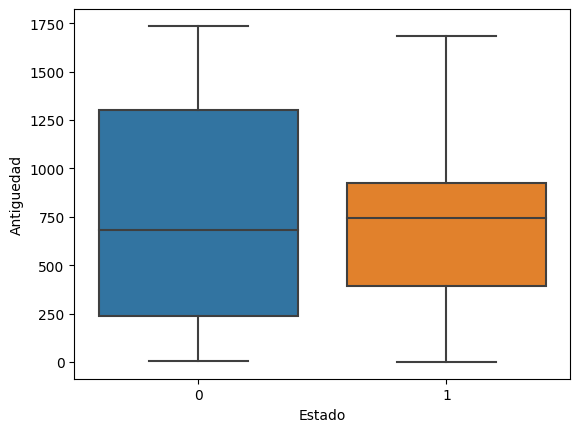

In [810]:
sns.boxplot(x = final_df['Estado'], y = final_df["Antiguedad"]);

<AxesSubplot: xlabel='Tickets_asociados', ylabel='Density'>

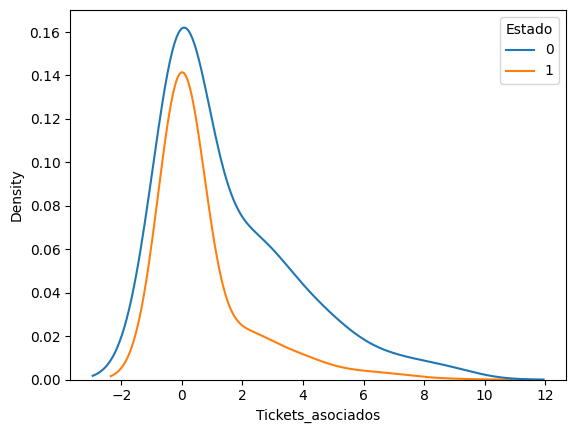

In [811]:
# Vemos que la cantidad de incidencias que han puesto los clientes es muy baja e incluso es mayor en el cliente que se encuentra activo
sns.kdeplot(x = 'Tickets_asociados', hue= 'Estado', data = final_df, bw_adjust=2)

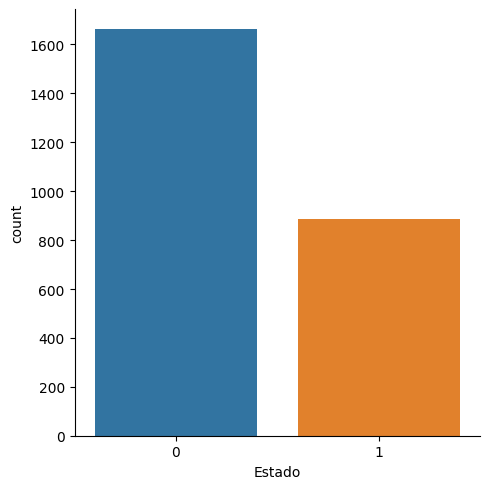

In [812]:
sns.catplot(x='Estado',data=final_df,kind="count");

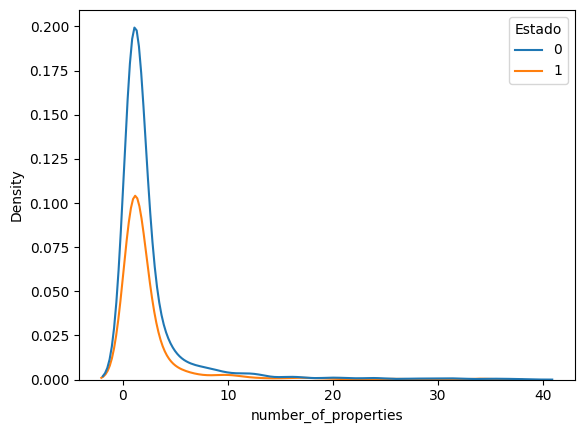

In [813]:
sns.kdeplot(x = 'number_of_properties', hue= 'Estado', data = final_df);

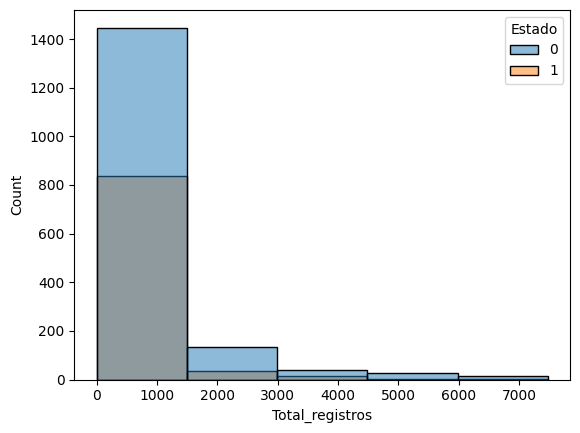

In [814]:
sns.histplot(x = 'Total_registros', hue= 'Estado', data = final_df, bins = 5);

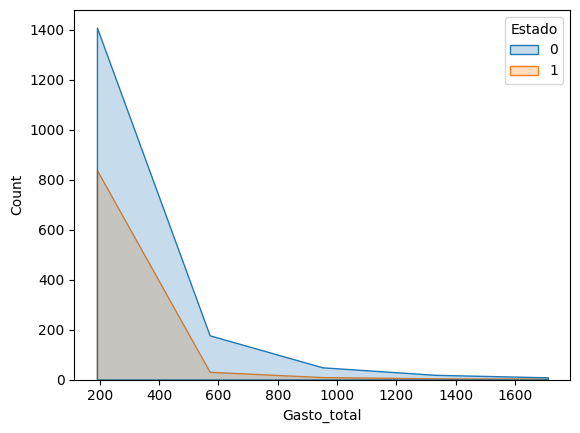

In [815]:
sns.histplot(x = 'Gasto_total', hue= 'Estado', data = final_df, bins = 5, element="poly");

In [816]:
final_df

,Estado,Total_registros,number_of_properties,Tickets_asociados,Gasto_total,Tiempo_sin_uso,Antiguedad
3,0,317,5,2,95.64,2,253
4,1,380,2,2,68.71,65,1152
5,0,441,1,0,118.05,5,1433
6,0,18,1,0,49.79,6,182
8,0,340,5,0,242.00,4,199
...,...,...,...,...,...,...,...
2794,1,9,1,0,219.14,140,934
2796,0,4364,1,4,304.05,4,253
2797,1,19,1,0,77.38,587,745
2798,0,110,12,0,205.10,2,44


Ya tenemos limpio el dataframe, vamos a asignar nuestra X e y

In [817]:
y = final_df.iloc[:,0]
X = final_df.iloc[:,1:]

Dividimos nuestro dataset en train y test

In [818]:
from sklearn.model_selection import train_test_split

np.random.seed(7)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2040, 6)
(510, 6)
(2040,)
(510,)


Vemos si nuestro target está balanceado

In [819]:
y_train.value_counts()

0    1330
1     710
Name: Estado, dtype: int64

Balanceamos las muestras y dibujamos el resultado

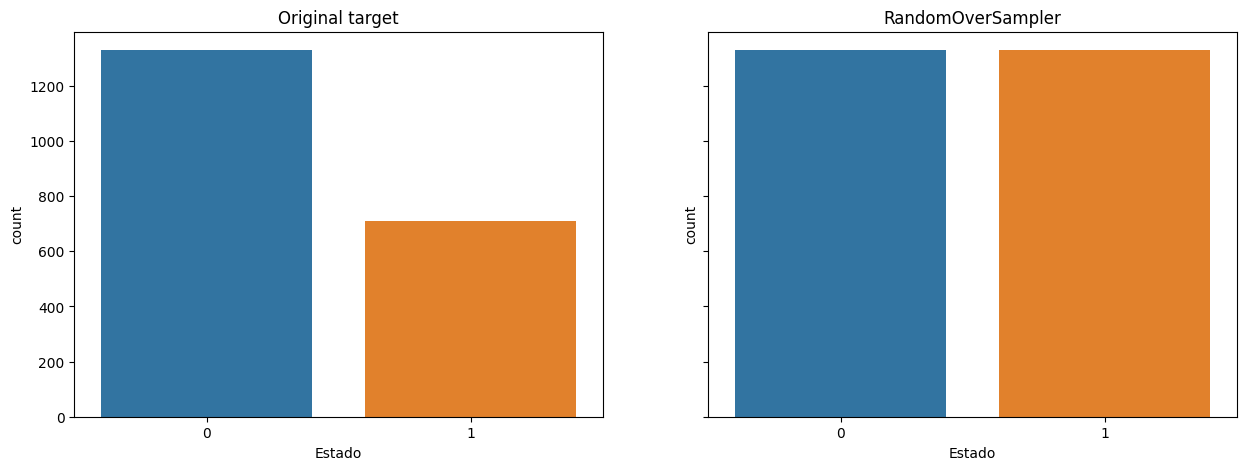

In [820]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
import seaborn as sns

# Original target
sns.countplot(x= y_train, data=final_df, ax=axes[0])
axes[0].set_title("Original target")

# Random Under Sampler
sns.countplot(x = y_ros, ax=axes[1])
axes[1].set_title("RandomOverSampler");

In [821]:
y_ros.value_counts()

0    1330
1    1330
Name: Estado, dtype: int64

Escalo mis datos de train

In [822]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_s = scaler.fit_transform(X_ros)

X_test_s = scaler.transform(X_test)

In [823]:
# X/y sin escalar --> X_ros, X_test, y_ros, y_test
# X/y escalado --> X_train_s, X_test_s, y_ros, y_test

ENTENAMOS NUESTROS DATOS CON DIFERENTES MODELOS

Probamos con Regresión logística

0.8019607843137255
0.727810650887574
0.6910112359550562
0.7089337175792507
0.7762285095437932


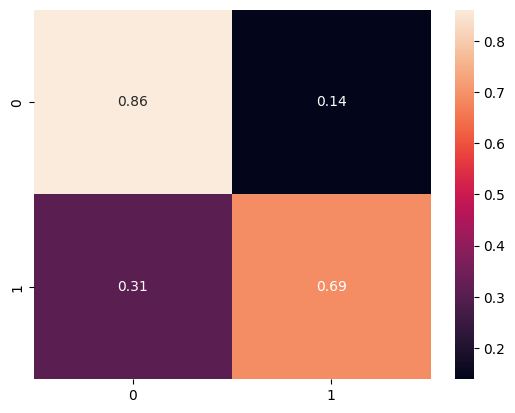

In [824]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model = LogisticRegression(solver='liblinear')
model.fit(X_train_s, y_ros)
y_pred = model.predict(X_test_s)

cm = metrics.confusion_matrix(y_test, y_pred)
row_sums = cm.sum(axis=1, keepdims=True)
norm_conf_mx = cm / row_sums
sns.heatmap(norm_conf_mx, annot = True)

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

Volvemos a hacer la regresión logística pero esta vez con cross validation

In [825]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model
from sklearn.metrics import classification_report

name='Logistic Regression'
log_reg = linear_model.LogisticRegression(solver='liblinear', multi_class = "auto")
log_reg.fit(X_train_s, y_ros)

kfold = KFold(n_splits=10) 
cv_results = cross_val_score(log_reg, X_train_s, y_ros, cv=kfold, scoring='recall')

msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

predictions = log_reg.predict(X_test_s)

print(classification_report(y_test,predictions))
lg_cv_accuracy = accuracy_score(y_test, predictions)
lg_cv_precision = precision_score(y_test, predictions)
lg_cv_recall = recall_score(y_test, predictions)
lg_cv_fi = f1_score(y_test, predictions)
lg_cv_roc = roc_auc_score(y_test, predictions)

[0.72631579 0.69662921 0.69662921 0.76530612 0.69148936 0.70212766
 0.73267327 0.68115942 0.59022556 0.60526316]
Logistic Regression: 0.688782 (0.051231)
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       332
           1       0.73      0.69      0.71       178

    accuracy                           0.80       510
   macro avg       0.78      0.78      0.78       510
weighted avg       0.80      0.80      0.80       510



Vamos a hacer un modelo de arbol

In [826]:
from sklearn.tree import DecisionTreeClassifier

tree_dtc = DecisionTreeClassifier(max_depth = 3, min_samples_leaf=20)
tree_dtc.fit(X_ros, y_ros)

# Comprobamos las métricas
pred = tree_dtc.predict(X_test)

print(classification_report(y_test,pred))

print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))
print(roc_auc_score(y_test, pred))

print("Recall test: ", recall_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       332
           1       0.70      0.83      0.76       178

    accuracy                           0.82       510
   macro avg       0.80      0.82      0.80       510
weighted avg       0.83      0.82      0.82       510

0.8156862745098039
0.6981132075471698
0.8314606741573034
0.758974358974359
0.819344794909977
Recall test:  0.8314606741573034


Realizamos ahora el modelo con cross validation

In [827]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

parameters = {'max_depth': [2,3,4,5],
              'min_samples_leaf': np.arange(3, 20)}
            #   'max_leaf_nodes': [10, 20, 35, 50]}

grid_tree = GridSearchCV(tree,parameters, scoring = "recall", cv = 10)

grid_tree.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             scoring='recall')

In [828]:
# Vemos cuáles son las predicciones:
best = grid_tree.best_estimator_
print('Best estimator:', best)
print('Best params:', grid_tree.best_params_)
print('Best score:', grid_tree.best_score_) 

# Miramos el reporte de clasificación:
tree_predictions = best.predict(X_test)
print(classification_report(y_test,tree_predictions))

# Miramos cuál es el score en recall
print('Recall score:', recall_score(y_test, tree_predictions))

dt_cv_accuracy = accuracy_score(y_test, tree_predictions)
dt_cv_precision = precision_score(y_test, tree_predictions)
dt_cv_recall = recall_score(y_test, tree_predictions)
dt_cv_fi = f1_score(y_test, tree_predictions)
dt_cv_roc = roc_auc_score(y_test, tree_predictions)

Best estimator: DecisionTreeClassifier(max_depth=3, min_samples_leaf=11)
Best params: {'max_depth': 3, 'min_samples_leaf': 11}
Best score: 0.8563380281690142
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       332
           1       0.70      0.83      0.76       178

    accuracy                           0.82       510
   macro avg       0.80      0.82      0.80       510
weighted avg       0.83      0.82      0.82       510

Recall score: 0.8314606741573034


Miramos cuáles son las variables más importantes

In [829]:
tdfi = best.feature_importances_

df_importance = pd.DataFrame(tdfi,
                            index = X.columns,
                            columns = ['Feature importances']).sort_values('Feature importances', ascending=False)
df_importance

,Feature importances
Tiempo_sin_uso,0.746156
Antiguedad,0.203189
Gasto_total,0.050655
Total_registros,0.000000
number_of_properties,0.000000
Tickets_asociados,0.000000


Dibujar el árbol sin filtrar (sin podar)

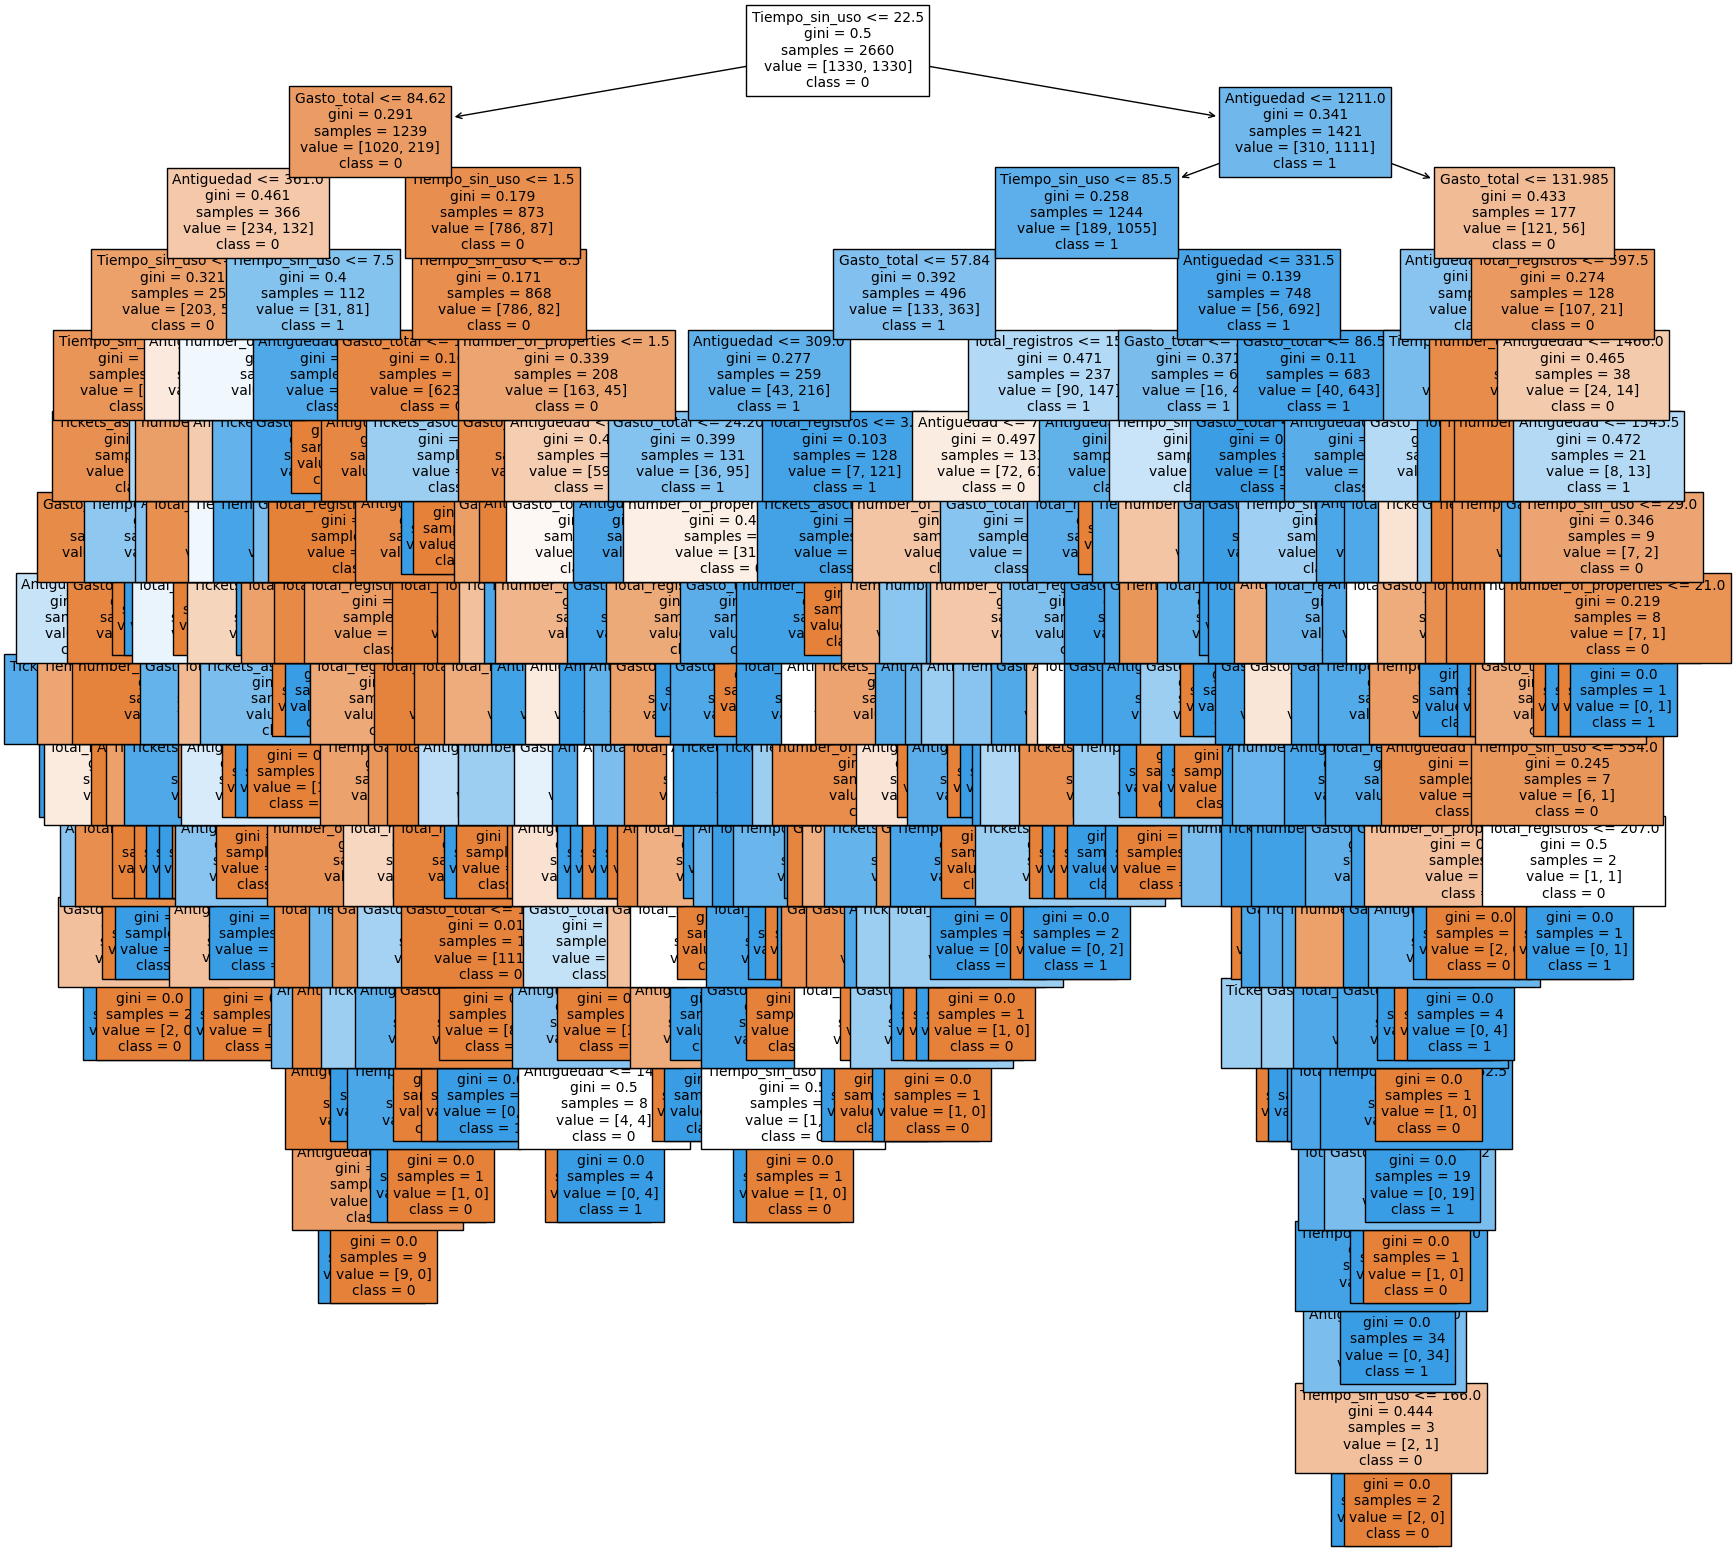

In [830]:
tree.fit(X_ros, y_ros)

import matplotlib.pyplot as plt
import sklearn

plt.figure(figsize = (20,20))

sklearn.tree.plot_tree(tree,
                      feature_names = X.columns,
                      class_names = ['0', '1'],
                      fontsize = 10,
                      filled = True);

Dibujar el árbol filtrado

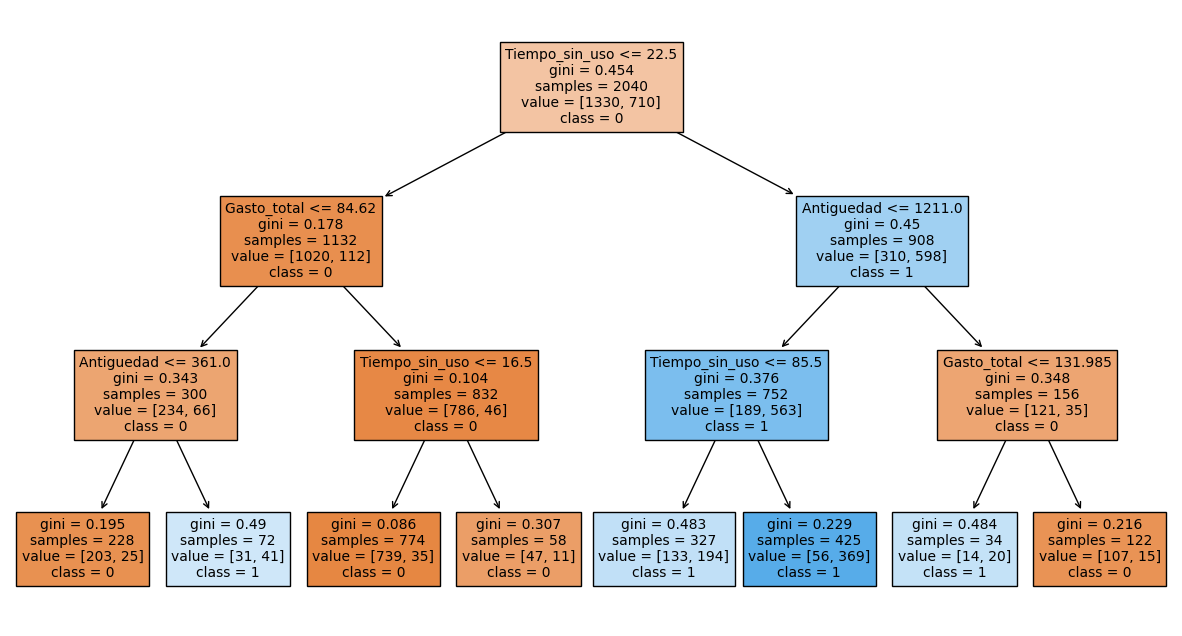

In [831]:
import matplotlib.pyplot as plt
import sklearn

plt.figure(figsize = (15,8))

sklearn.tree.plot_tree(best,
                      feature_names = X.columns,
                      class_names = ['0', '1'],
                      fontsize = 10,
                      filled = True);

Modelo de KNN con 7 vecinos

In [832]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 13

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_s, y_ros)

y_pred = knn.predict(X_test_s)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_fi = f1_score(y_test, y_pred)
knn_roc = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       332
           1       0.74      0.78      0.76       178

    accuracy                           0.83       510
   macro avg       0.81      0.81      0.81       510
weighted avg       0.83      0.83      0.83       510

Recall score: 0.7752808988764045


Saber cuál es el mejor número para k (vecinos)

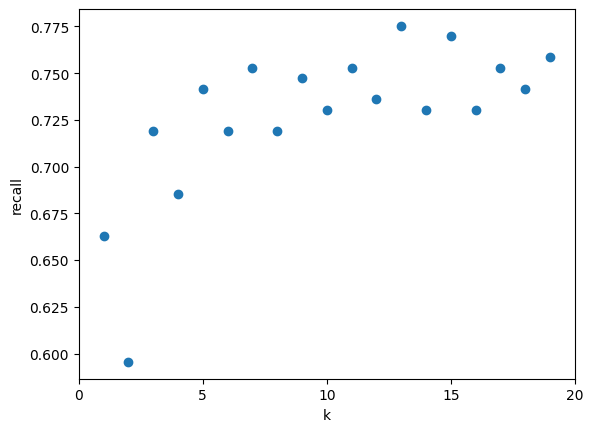

In [833]:
k_range = range(1,20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train_s, y_ros)
    pred = knn.predict(X_test_s)
    scores.append(recall_score(y_test, pred))

plt.figure()
plt.xlabel('k')
plt.ylabel('recall')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

# Vemos que 13 es el k que mejos nos predice los datos

Modelo de SVC LINEAL con un C=10

In [834]:
from sklearn import svm

svc = svm.LinearSVC(C=10, loss='hinge', max_iter=10000)
svc.fit(X_train_s, y_ros)
pred = svc.predict(X_test_s)

print(classification_report(y_test, pred))
print('Recall score:', recall_score(y_test, pred))

# Vemos que el kernel lineal no es el que mejor se adecua

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       332
           1       0.83      0.62      0.71       178

    accuracy                           0.82       510
   macro avg       0.83      0.78      0.79       510
weighted avg       0.82      0.82      0.82       510

Recall score: 0.6235955056179775


SVC POLINÓMICO

In [835]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

poly_kernel_svm_clf = Pipeline([
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X_train_s, y_ros)
pred = poly_kernel_svm_clf.predict(X_test_s)

print(accuracy_score(y_test, pred))
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))
print(f1_score(y_test, pred))
print(roc_auc_score(y_test, pred))
print(classification_report(y_test, pred))
print('Recall score:', recall_score(y_test, pred))

0.8509803921568627
0.8148148148148148
0.7415730337078652
0.7764705882352941
0.8256057939623663
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       332
           1       0.81      0.74      0.78       178

    accuracy                           0.85       510
   macro avg       0.84      0.83      0.83       510
weighted avg       0.85      0.85      0.85       510

Recall score: 0.7415730337078652


In [836]:
poly_kernel_svm_clf = Pipeline([
    ("svm_clf", SVC(kernel="poly", coef0=1, C=3, gamma = 3))
])
poly_kernel_svm_clf.fit(X_train_s, y_ros)
pred = poly_kernel_svm_clf.predict(X_test_s)

svc_accuracy = accuracy_score(y_test, pred)
svc_precision = precision_score(y_test, pred)
svc_recall = recall_score(y_test, pred)
svc_fi = f1_score(y_test, pred)
svc_roc = roc_auc_score(y_test, pred)

print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.87      0.90      0.89       332
           1       0.81      0.75      0.78       178

    accuracy                           0.85       510
   macro avg       0.84      0.83      0.83       510
weighted avg       0.85      0.85      0.85       510



Ver los mejores parámetros de C y gamma

In [837]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 5, 10]
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

best_score = 0
best_params = {'C': None, 'gamma': None}

for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X_train_s, y_ros)
        pred= svc.predict(X_test_s)
        score = recall_score(y_test, pred)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma

best_score, best_params

(0.7584269662921348, {'C': 3, 'gamma': 3})

ENSEMBLING

Hard voting

In [838]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(7)
rnd_clf = RandomForestClassifier(n_estimators = 100)
svm_clf = SVC(kernel = 'poly', coef0 = 1, C = 10, gamma = 10)

voting_clf = VotingClassifier(
    estimators = [('knn', knn), ('rf', rnd_clf), ('svc', svm_clf)],
voting = "hard"
)

voting_clf.fit(X_train_s, y_ros)

for clf in (knn, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_s, y_ros)
    y_pred = clf.predict(X_test_s)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))


KNeighborsClassifier 0.7528089887640449
RandomForestClassifier 0.8314606741573034
SVC 0.7584269662921348
VotingClassifier 0.7696629213483146


Soft voting

In [839]:
knn = KNeighborsClassifier(7)
rnd_clf = RandomForestClassifier(n_estimators = 100)
svm_clf = SVC(gamma = 'scale', probability = True)

voting_clf = VotingClassifier(
    estimators = [('knn', knn), ('rf', rnd_clf), ('svc', svm_clf)],
voting = "soft"
)

voting_clf.fit(X_train_s, y_ros)

for clf in (knn, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train_s, y_ros)
    y_pred = clf.predict(X_test_s)
    print(clf.__class__.__name__, recall_score(y_test, y_pred))


### Vemos que el recall es mayor que con el hard voting

KNeighborsClassifier 0.7528089887640449
RandomForestClassifier 0.797752808988764
SVC 0.7359550561797753
VotingClassifier 0.7696629213483146


BAGGING - Decision Tree Classifier

In [840]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap = True)
bag_clf.fit(X_ros, y_ros)
y_pred = bag_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       332
           1       0.76      0.80      0.78       178

    accuracy                           0.85       510
   macro avg       0.83      0.84      0.83       510
weighted avg       0.85      0.85      0.85       510

Recall score: 0.8033707865168539


In [841]:
bag_clf = BaggingClassifier(
DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 3),
    n_estimators = 500, max_samples = 1.0, bootstrap = True)

bag_clf.fit(X_ros, y_ros)
y_pred = bag_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85       332
           1       0.70      0.83      0.76       178

    accuracy                           0.82       510
   macro avg       0.80      0.82      0.81       510
weighted avg       0.83      0.82      0.82       510

Recall score: 0.8314606741573034


MODELO RANDOM FOREST

In [842]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16)

rnd_clf.fit(X_ros, y_ros)
y_pred_rf = rnd_clf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_fi = f1_score(y_test, y_pred_rf)
rf_roc = roc_auc_score(y_test, y_pred_rf)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       332
           1       0.74      0.81      0.78       178

    accuracy                           0.84       510
   macro avg       0.82      0.83      0.82       510
weighted avg       0.84      0.84      0.84       510



MODELO BOOSTING - ADA BOOST

In [843]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=3), n_estimators = 200,
    algorithm = "SAMME.R", learning_rate = 0.5, random_state=42)

ada_clf.fit(X_ros, y_ros)

y_pred = ada_clf.predict(X_test)

ada_accuracy = accuracy_score(y_test, y_pred)
ada_precision = precision_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_fi = f1_score(y_test, y_pred)
ada_roc = roc_auc_score(y_test, y_pred)

print(classification_report(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       332
           1       0.84      0.83      0.83       178

    accuracy                           0.88       510
   macro avg       0.87      0.87      0.87       510
weighted avg       0.88      0.88      0.88       510

Recall score: 0.8258426966292135


MODELO BOOSTING GRADIENT BOOSTING

In [844]:
from sklearn.ensemble import GradientBoostingClassifier

gb_c = GradientBoostingClassifier()
gb_c.fit(X_train_s, y_ros)

y_pred = gb_c.predict(X_test_s)

print(classification_report(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))

gb_c_accuracy = accuracy_score(y_test, y_pred)
gb_c_precision = precision_score(y_test, y_pred)
gb_c_recall = recall_score(y_test, y_pred)
gb_c_fi = f1_score(y_test, y_pred)
gb_c_roc = roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       332
           1       0.81      0.84      0.83       178

    accuracy                           0.88       510
   macro avg       0.86      0.87      0.86       510
weighted avg       0.88      0.88      0.88       510

Recall score: 0.8370786516853933


GRID SEARCH CROSS VALIDATION

In [845]:
from sklearn.feature_selection import SelectKBest
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

smt = SMOTE(random_state=42)

knn = make_pipeline(
    smt, MinMaxScaler(), KNeighborsClassifier()
)

KNN_params = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11]
}

random_forest = make_pipeline(
    smt, RandomForestClassifier()
)

random_forest_params = {
    'randomforestclassifier__n_estimators': [10, 100, 500],
    'randomforestclassifier__max_depth': [3,5]
}

svc = make_pipeline(
    smt, MinMaxScaler(), SelectKBest(), SVC()
)

svc_params = {
    'selectkbest__k': [2, 3, 4],
    'svc__kernel': ['poly', 'sigmoid'],
    'svc__C': [1, 5, 10],
    'svc__coef0': [0, 1, 10]
}

gbc = make_pipeline(
    smt, GradientBoostingClassifier()
)

gbc_params = {
    'gradientboostingclassifier__learning_rate': [1.0, 2.0]
}

dtc = make_pipeline(
    DecisionTreeClassifier()
)

dtc_params = {
    'decisiontreeclassifier__max_depth': [2,3,4,5],
    'decisiontreeclassifier__min_samples_leaf': np.arange(3,20)
}


skf = StratifiedKFold(n_splits=10)

gs_knn = GridSearchCV(knn,
                   KNN_params,
                   cv = skf,
                   scoring = 'recall',
                   n_jobs=-1)

gs_rf = GridSearchCV(random_forest,
                    random_forest_params,
                    cv = skf,
                    scoring = 'recall',
                    n_jobs=-1)

gs_svc = GridSearchCV(svc,
                    svc_params,
                    cv = skf,
                    scoring = 'recall',
                    n_jobs=-1)

gs_gbc = GridSearchCV(gbc,
                    gbc_params,
                    cv = skf,
                    scoring = 'recall',
                    n_jobs=-1)

gs_dtc = GridSearchCV(dtc,
                    dtc_params,
                    cv = skf,
                    scoring = 'recall',
                    n_jobs=-1)

grids = {
    "gs_knn": gs_knn,
    "gs_rf": gs_rf,
    "gs_svc": gs_svc,
    "gs_gbc": gs_gbc,
    "gs_dtc": gs_dtc
}


In [846]:
%%time 
for nombre, grid_search in grids.items(): #cuando hago grids.items me devuelve clave - valor... 
    grid_search.fit(X_train, y_train)

CPU times: total: 3.75 s
Wall time: 2min 8s


SACÁMOS LOS MEJORES PARÁMETROS DE CADA MODELO

In [847]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]

best_grids = pd.DataFrame(best_grids, columns = ["Grid", "Best score"])
best_grids.sort_values(by = "Best score", ascending = False)

,Grid,Best score
2,gs_svc,0.900000
4,gs_dtc,0.856338
1,gs_rf,0.846479
3,gs_gbc,0.840845
0,gs_knn,0.761972


In [848]:
print("Best estimator:", gs_svc.best_estimator_)
print("Best params:", gs_svc.best_params_)
print("Best score:", gs_svc.best_score_)

Best estimator: Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('minmaxscaler', MinMaxScaler()),
                ('selectkbest', SelectKBest(k=2)),
                ('svc', SVC(C=1, coef0=10, kernel='sigmoid'))])
Best params: {'selectkbest__k': 2, 'svc__C': 1, 'svc__coef0': 10, 'svc__kernel': 'sigmoid'}
Best score: 0.9


Miramos las métricas del mejor modelo

In [849]:
best = gs_svc.best_estimator_
predictions = best.predict(X_test)
print(classification_report(y_test, predictions))

gs_svc_accuracy = accuracy_score(y_test, predictions)
gs_svc_precision = precision_score(y_test, predictions)
gs_svc_recall = recall_score(y_test, predictions)
gs_svc_fi = f1_score(y_test, predictions)
gs_svc_roc = roc_auc_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.85      0.36      0.51       332
           1       0.43      0.88      0.58       178

    accuracy                           0.55       510
   macro avg       0.64      0.62      0.54       510
weighted avg       0.70      0.55      0.53       510



Perceptrón multicapa

In [850]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train_s, y_ros)
pred = mlp.predict(X_test_s)
recall_score(y_test, pred)

0.7808988764044944

In [851]:
mlp = MLPClassifier(max_iter=200, # 200 pasos
                   activation='tanh', # tangente hiperbólica
                   hidden_layer_sizes = (150, 150, 150), # tamaño de las capas ocultas. Cantidad de neuronas de cada capa (X1, X2, X3). Cada salida se mete en la siguiente capa
)

mlp.fit(X_train_s, y_ros)
pred = mlp.predict(X_test_s)
recall_score(y_test, pred)

0.7696629213483146

In [852]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Volvemos a dividir el train para realizar la validación

In [853]:
X_train_n, X_valid_n, y_train_n, y_valid_n = train_test_split(X_ros,
                                                      y_ros)

Escalamos nuestra X

In [854]:
scaler = MinMaxScaler()
X_train_n = scaler.fit_transform(X_train_n)
X_valid_n = scaler.transform(X_valid_n)
X_test_n = scaler.transform(X_test)

Definimos nuestro modelo secuencial

In [855]:
model = Sequential()
model.add(Dense(12, input_shape=(6,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [856]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 12)                84        
                                                                 
 dense_19 (Dense)            (None, 8)                 104       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [857]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])

Entrenamos nuestra red neuronal

In [858]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
model.fit(X_train_n, y_train_n, epochs=150,  batch_size=10, validation_data = (X_valid_n, y_valid_n), callbacks = [early_stopping_cb])

Epoch 1/150
200/200 [==============================] - 3s 5ms/step - loss: 0.6728 - accuracy: 0.6642 - precision_2: 0.7389 - recall_6: 0.4924 - auc_2: 0.7372 - val_loss: 0.6489 - val_accuracy: 0.6917 - val_precision_2: 0.7518 - val_recall_6: 0.6110 - val_auc_2: 0.7807
Epoch 2/150
200/200 [==============================] - 0s 2ms/step - loss: 0.6020 - accuracy: 0.7218 - precision_2: 0.7524 - recall_6: 0.6490 - auc_2: 0.7996 - val_loss: 0.5708 - val_accuracy: 0.7143 - val_precision_2: 0.7698 - val_recall_6: 0.6455 - val_auc_2: 0.7955
Epoch 3/150
200/200 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.7429 - precision_2: 0.7560 - recall_6: 0.7060 - auc_2: 0.8213 - val_loss: 0.5368 - val_accuracy: 0.7338 - val_precision_2: 0.7560 - val_recall_6: 0.7233 - val_auc_2: 0.8071
Epoch 4/150
200/200 [==============================] - 1s 3ms/step - loss: 0.5077 - accuracy: 0.7644 - precision_2: 0.7905 - recall_6: 0.7101 - auc_2: 0.8334 - val_loss: 0.5277 - val_accuracy: 

Declaramos nuestras métricas

In [859]:
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test_s, y_test)
print(test_recall)

16/16 [==============================] - 0s 2ms/step - loss: 0.3726 - accuracy: 0.8412 - precision_2: 0.7740 - recall_6: 0.7697 - auc_2: 0.9083
0.7696629166603088


In [860]:
test_f1 = 2 * ((test_precision*test_recall)/(test_precision+test_recall))
test_f1

0.771830990757646

Creamos un dataframe con todas las métricas de cada modelo

In [861]:
modelos = ['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'GridSearchCV_SVC', 'KerasSequential']

data = {'Modelos': ['Logistic Regression', 'Decision Tree', 'KNeighbors', 'SVC', 'Random Forest', 'Ada Boost', 'Gradient Boosting', 'Grid Search CV_SVC', 'Keras Sequential'],
        'Accuracy': [lg_cv_accuracy, dt_cv_accuracy, knn_accuracy, svc_accuracy, rf_accuracy, ada_accuracy, gb_c_accuracy, gs_svc_accuracy, test_accuracy],
        'Precision': [lg_cv_precision, dt_cv_precision, knn_precision, svc_precision, rf_precision, ada_precision, gb_c_precision, gs_svc_precision, test_precision],
        'Recall': [lg_cv_recall, dt_cv_recall, knn_recall, svc_recall, rf_recall, ada_recall, gb_c_recall, gs_svc_recall, test_recall],
        'F1': [lg_cv_fi, dt_cv_fi, knn_fi, svc_fi, rf_fi, ada_fi, gb_c_fi, gs_svc_fi, test_f1],
        'ROC AUC': [lg_cv_roc, dt_cv_roc, knn_roc, svc_roc, rf_roc, ada_roc, gb_c_roc, gs_svc_roc, test_auc]}

df = pd.DataFrame(data)
df.set_index('Modelos', inplace = True)
df.sort_values(by = 'Recall', ascending= False, inplace = True)
df

,Accuracy,Precision,Recall,F1,ROC AUC
Modelos,,,,,
Grid Search CV_SVC,0.545098,0.426630,0.882022,0.575092,0.623240
Gradient Boosting,0.876471,0.814208,0.837079,0.825485,0.867335
Decision Tree,0.815686,0.698113,0.831461,0.758974,0.819345
Ada Boost,0.882353,0.835227,0.825843,0.830508,0.869247
Random Forest,0.837255,0.743590,0.814607,0.777480,0.832002
KNeighbors,0.825490,0.737968,0.775281,0.756164,0.813845
Keras Sequential,0.841176,0.774011,0.769663,0.771831,0.908302
SVC,0.849020,0.806061,0.747191,0.775510,0.825403
Logistic Regression,0.801961,0.727811,0.691011,0.708934,0.776229
